# CNN Implementation CNN to Solve 3x3 Jigsaw

### 1. Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import MaxPooling1D, Conv1D, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers import TimeDistributed, GlobalAveragePooling2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Input, Dropout, Conv2D, BatchNormalization, MaxPool2D, Activation
from tensorflow.keras.layers import TimeDistributed as td
%load_ext autoreload
%autoreload 2

### 2. Prepare the Data

In [2]:
train_path = "E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_3x3/train/"
val_path = "E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_3x3/valid/"
test_path = "E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_3x3/test/"

Load Training Dataset

In [5]:
# Load Training Dataset
data_train = []
label_train = []
label_train_onehot = []

df_train = pd.read_csv(r"E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_3x3/train.csv", header = 0)
for i in range(90000):# df_train.shape[0]
    img_name = df_train['image'][i]
    img = plt.imread(train_path + img_name)
    data_train.append(img.reshape(1, 201, 201, 3))
    
    label = df_train['label'][i].split()
    label = [int(i) for i in label]
    label_train.append(np.array(label).reshape(1,9))
    
data_train = np.concatenate(data_train, axis=0)
label_train = np.concatenate(label_train, axis=0)


print("training data: ", data_train.shape)
print("training label: ", label_train.shape)

training data:  (90000, 201, 201, 3)
training label:  (90000, 9)


Load Validation Dataset

In [6]:
# Load Validation Set
data_val = []
label_val = []

for i in range(90000, 93000):# size of validation set
    img_name = df_train['image'][i]
    img = plt.imread(train_path + img_name)
    data_val.append(img.reshape(1, 201, 201, 3))
    
    label = df_train['label'][i].split()
    label = [int(i) for i in label]
    label_val.append(np.array(label).reshape(1,9))

data_val = np.concatenate(data_val, axis=0)
label_val = np.concatenate(label_val, axis=0)

print("validation data: ", data_val.shape)
print("validation label: ", label_val.shape)

validation data:  (3000, 201, 201, 3)
validation label:  (3000, 9)


Load Testing Set

In [7]:
data_test = []
label_test = []

df_test = pd.read_csv(r"E:/Stanford_Spring_2122/CS229/Final_Project/data/puzzle_3x3/test.csv", header = 0)
for i in range(df_test.shape[0]):
    img_name = df_test['image'][i]
    img = plt.imread(test_path + img_name)
    data_test.append(img.reshape(1, 201, 201, 3))
    
    label = df_test['label'][i].split()
    label = [int(i) for i in label]
    label_test.append(np.array(label).reshape(1,9))

data_test = np.concatenate(data_test, axis=0)
label_test = np.concatenate(label_test, axis=0)

print("testing data: ", data_test.shape)
print("testing label: ", label_test.shape)

testing data:  (2181, 201, 201, 3)
testing label:  (2181, 9)


Show some example training images and their labels.

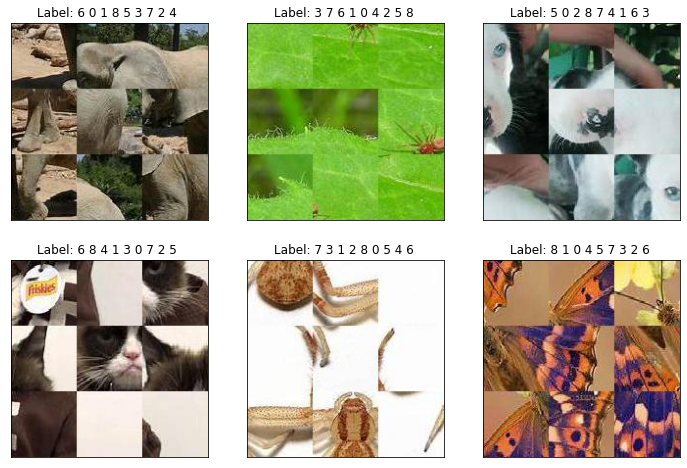

In [8]:
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title("Label: " + df_train['label'][i])
    plt.subplots_adjust(wspace=None, hspace=None)
    
    img_name = df_train['image'][i]
    img = plt.imread(train_path + img_name)
    plt.imshow(img)
plt.show()

### 3. Set Hyperparameters for CNN Model

In [16]:
lr = 0.1 # learning rate
decay = 1e-3 # learning rate decay
epochs = 20
batch_size = 256

input_shape = (201, 201, 3)
dropout_rate = 0.3

### 4. Build the CNN Model

In [17]:
# Initiate a Keras sequential model
model = keras.models.Sequential()

# Feature Extractor
model.add(keras.Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', strides=2))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu', strides=1))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(600, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(81))
model.add(Reshape((9, 9)))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 101, 101, 32)      2432      
_________________________________________________________________
batch_normalization_20 (Batc (None, 101, 101, 32)      128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 101, 101, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 101, 101, 32)      9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 101, 101, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 64)       

### 5. Training the CNN Model

In [18]:
adam = tf.keras.optimizers.Adam(learning_rate=lr, decay=decay)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(data_train,
                    label_train, 
                    epochs=epochs, batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(data_val, label_val))

Epoch 1/20
262/352 [=====================>........] - ETA: 7:47 - loss: 2.4108 - accuracy: 0.1118

KeyboardInterrupt: 

Save trained model as .h5

In [ ]:
model.save("CNN_3x3_20epoch_split_0.01.h5")

Plot training result

In [ ]:
# Rebuild the matplotlib font cache
#fm._rebuild()
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans' # font
plt.rcParams['font.size'] = 18         # font size
plt.rcParams['axes.linewidth'] = 2     # axes width

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])    # Add axes object to our figure that takes up entire figure
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.plot(history.history["accuracy"], linewidth=2, color='b', label="Train Acc", alpha = 1)
ax.plot(history.history["val_accuracy"], linewidth=2, color='r', label="Val Acc", alpha = 1)
ax.set_ylabel('Accuracy', labelpad=10, fontsize=20)
ax.set_xlabel('Epochs', labelpad=10, fontsize=20)
ax.grid(color='g', ls = '-.', lw = 0.5)
plt.legend(loc="lower right", fontsize=20)
plt.title("2D CNN Model for 3x3 Puzzle")
plt.savefig('3x3Acc_20epoch_split_0.01.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
# Rebuild the matplotlib font cache
#fm._rebuild()
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans' # font
plt.rcParams['font.size'] = 18         # font size
plt.rcParams['axes.linewidth'] = 2     # axes width

fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])    # Add axes object to our figure that takes up entire figure
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax.plot(history.history["loss"], linewidth=2, color='b', label="Train Loss", alpha = 1)
ax.plot(history.history["val_loss"], linewidth=2, color='r', label="Val Loss", alpha = 1)
ax.set_ylabel('Loss', labelpad=10, fontsize=20)
ax.set_xlabel('Epochs', labelpad=10, fontsize=20)
ax.grid(color='g', ls = '-.', lw = 0.5)
plt.legend(loc="upper right", fontsize=20)
plt.title("2D CNN Model for 3x3 Puzzle")
plt.savefig('3x3Loss_20epoch_split_0.01.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

### 6. Evaluation

In [ ]:
model_loaded = keras.models.load_model("CNN_3x3_20epoch_split_0.01.h5")
outputs = model_loaded.predict(data_test)
predictions = np.argmax(outputs, axis=2)

compare = (predictions == label_test)
num_correct = np.sum(compare)
print(f"Accuracy on Test Set = {round(num_correct / (predictions.shape[0] * predictions.shape[1]) * 100, 2)}%")

Example prediction

In [ ]:
from util import *

plt.figure(figsize=(15, 20))
for i in range(6):
    plt.subplot(6, 3, 3*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title("Shuffled Img", fontsize=16)
    plt.subplots_adjust(wspace=None, hspace=None)
    randInt = np.random.randint(2181)
    img_name = df_test['image'][randInt]
    img = plt.imread(test_path + img_name)
    plt.imshow(img)
    
    plt.subplot(6, 3, 3*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title("Ground Truth: " + df_test['label'][randInt], fontsize=16)
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.imshow(rearrange3x3(label_test[randInt], data_test[randInt]).astype(int))
    
    plt.subplot(6, 3, 3*i+3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = ""
    for a in predictions[randInt]:
        predicted_label += " " + str(a)
    plt.title("Prediction:" + predicted_label, fontsize=16)
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.imshow(rearrange3x3(predictions[randInt], data_test[randInt]).astype(int))
plt.show()